# Module 0.2: Multi-Qubit Systems

### Section 0.2.0: Tensor Products

Tensor products are used to describe multi-qubit systems. For example:

- $|0\rangle \otimes |0\rangle = |00\rangle$
- $|0\rangle \otimes |1\rangle = |01\rangle$
-  
$|+\rangle \otimes |+\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$
-  
$|+\rangle \otimes |-\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

In [1]:
from qiskit.quantum_info import Statevector

# Tensor product of |0> and |0>
print("Tensor |0⟩ ⊗ |0⟩ =", Statevector.from_label('00'))

# Tensor |+> ⊗ |+>
plus_plus = Statevector([0.5, 0.5, 0.5, 0.5])
print("|+⟩ ⊗ |+⟩ =", plus_plus)


Tensor |0⟩ ⊗ |0⟩ = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
|+⟩ ⊗ |+⟩ = Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


**What You Need to Know for the Exam:**
- ✅ Multi-qubit states are tensor products of single-qubit states
- ✅ Gates on multiple qubits can be tensor products of single-qubit gates (e.g.,  
\( $I \otimes X$ \))
- ✅ Tensor product order matters: \(  
$|0\rangle \otimes |1\rangle \ne |1\rangle \otimes |0\rangle$ \)
- ✅ You should understand how these operations affect statevectors and circuits

## Section 0.2.1 – Gate Tensor Products

Gate operations on multi-qubit systems can be expressed as tensor products of  
single-qubit gates. For example, applying the Pauli-X gate to the *second* qubit  
in a three-qubit system corresponds to:

   $I \otimes X \otimes I$

This operation will flip the middle qubit state of any three-qubit vector.

Initial state: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


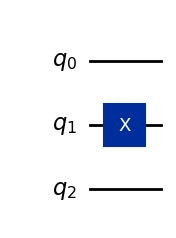

After I⊗X⊗I on |010> → Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Probabilities: {np.str_('000'): np.float64(1.0)}


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator

# Initial state |010>
state = Statevector.from_label('010')
print('Initial state:', state)

# Build gate: X on qubit 1 (middle qubit)
qc = QuantumCircuit(3)
qc.x(1)
display(qc.draw('mpl'))

# Evolve the state
new_state = state.evolve(qc.to_instruction())
print('After I⊗X⊗I on |010> →', new_state)
print('Probabilities:', new_state.probabilities_dict())

### Common pitfall: A note on Qiskit's little endian convention

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliGate

qc = QuantumCircuit(3)
qc.append(PauliGate('IIZ'), [0, 1, 2])  # Z -> q0 (top)
print(qc.decompose().draw())


     ┌───┐
q_0: ┤ Z ├
     └───┘
q_1: ─────
          
q_2: ─────
          


### Practice Examples: Gate Tensor Products

Below are several gate tensor product operations. Predict the output state and  
then verify using Qiskit.

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Example 1: I⊗I⊗X on |000> → flips last qubit to |001>
state1 = Statevector.from_label('000')
qc1 = QuantumCircuit(3)
qc1.x(2)
print('Example 1 result:', state1.evolve(qc1.to_instruction()))

# Example 2: X⊗X on |00> → flips both qubits to |11>
state2 = Statevector.from_label('00')
qc2 = QuantumCircuit(2)
qc2.x(0); qc2.x(1)
print('Example 2 result:', state2.evolve(qc2.to_instruction()))

# Example 3: H⊗I on |10> → superposition on first qubit
state3 = Statevector.from_label('10')
qc3 = QuantumCircuit(2)
qc3.h(0)
print('Example 3 result:', state3.evolve(qc3.to_instruction()))

# Example 4: I⊗H⊗Z on |011> → H on second, Z on third
state4 = Statevector.from_label('011')
qc4 = QuantumCircuit(3)
qc4.h(1); qc4.z(2)
print('Example 4 result:', state4.evolve(qc4.to_instruction()))

# Example 5: RZ(pi/2)⊗RX(pi) on |-->
import numpy as np
minus_minus = Statevector([1/2**0.5, -1/2**0.5]).tensor(Statevector([1/2**0.5, -1/2**0.5]))
qc5 = QuantumCircuit(2)
qc5.rz(np.pi/2, 0); qc5.rx(np.pi, 1)
print('Example 5 result:', minus_minus.evolve(qc5.to_instruction()))

Example 1 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Example 2 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Example 3 result: Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))
Example 4 result: Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
Example 5 result: Statevector([ 0.35355339+0.35355339j,  0.35355339-0.35355339j,
             -0.35355339-0.35355339j, -0.35355339+0.35355339j],
            dims=(2, 2))


### Practice Questions (Advanced)

**Q1.** Starting from $|10\rangle$, apply $(H \otimes I)$. What is the resulting  
state?
- A. $(|00\rangle - |10\rangle)/\sqrt{2}$
- B. $(|10\rangle + |11\rangle)/\sqrt{2}$
- C. $(|00\rangle + |10\rangle)/\sqrt{2}$
- D. $(|01\rangle + |11\rangle)/\sqrt{2}$

**Q2.** Starting from $|01\rangle$, apply $(I \otimes H)$. What state do you  
obtain?
- A. $(|00\rangle - |01\rangle)/\sqrt{2}$
- B. $(|01\rangle + |11\rangle)/\sqrt{2}$
- C. $(|00\rangle + |01\rangle)/\sqrt{2}$
- D. $(|10\rangle + |11\rangle)/\sqrt{2}$

**Q3.** On $|00\rangle$, applying $(H \otimes X)$ yields:
- A. $(|01\rangle + |11\rangle)/\sqrt{2}$
- B. $(|00\rangle + |10\rangle)/\sqrt{2}$
- C. $(|01\rangle + |10\rangle)/\sqrt{2}$
- D. $(|11\rangle)/\sqrt{2}$

**Q4.** Which tensor product applies a Pauli-X to every qubit in a three-qubit  
system?
- A. $X \otimes X \otimes X$
- B. $RX(\pi) \otimes RX(\pi) \otimes RX(\pi)$
- C. $H \otimes H \otimes H$
- D. $I \otimes I \otimes I$

**Q5.** Starting from $|00\rangle$, apply $(RY(\pi/2) \otimes I)$. Which state is  
obtained?
- A. $(|00\rangle + |10\rangle)/\sqrt{2}$
- B. $(|00\rangle + |01\rangle)/\sqrt{2}$
- C. $(|10\rangle + |11\rangle)/\sqrt{2}$
- D. $(|01\rangle + |11\rangle)/\sqrt{2}$

### Answer Key
- Q1: A
- Q2: A
- Q3: A
- Q4: A
- Q5: A